# Extensive Example

In [1]:
import piscola

print(f'PISCOLA version: v{piscola.__version__}')

PISCOLA version: v3.0.0


In this example, we will use a different SN. We will use SN 2008gp, a well-sampled low-*z* SN observed by the Carnegie Supernova Project (CSP).

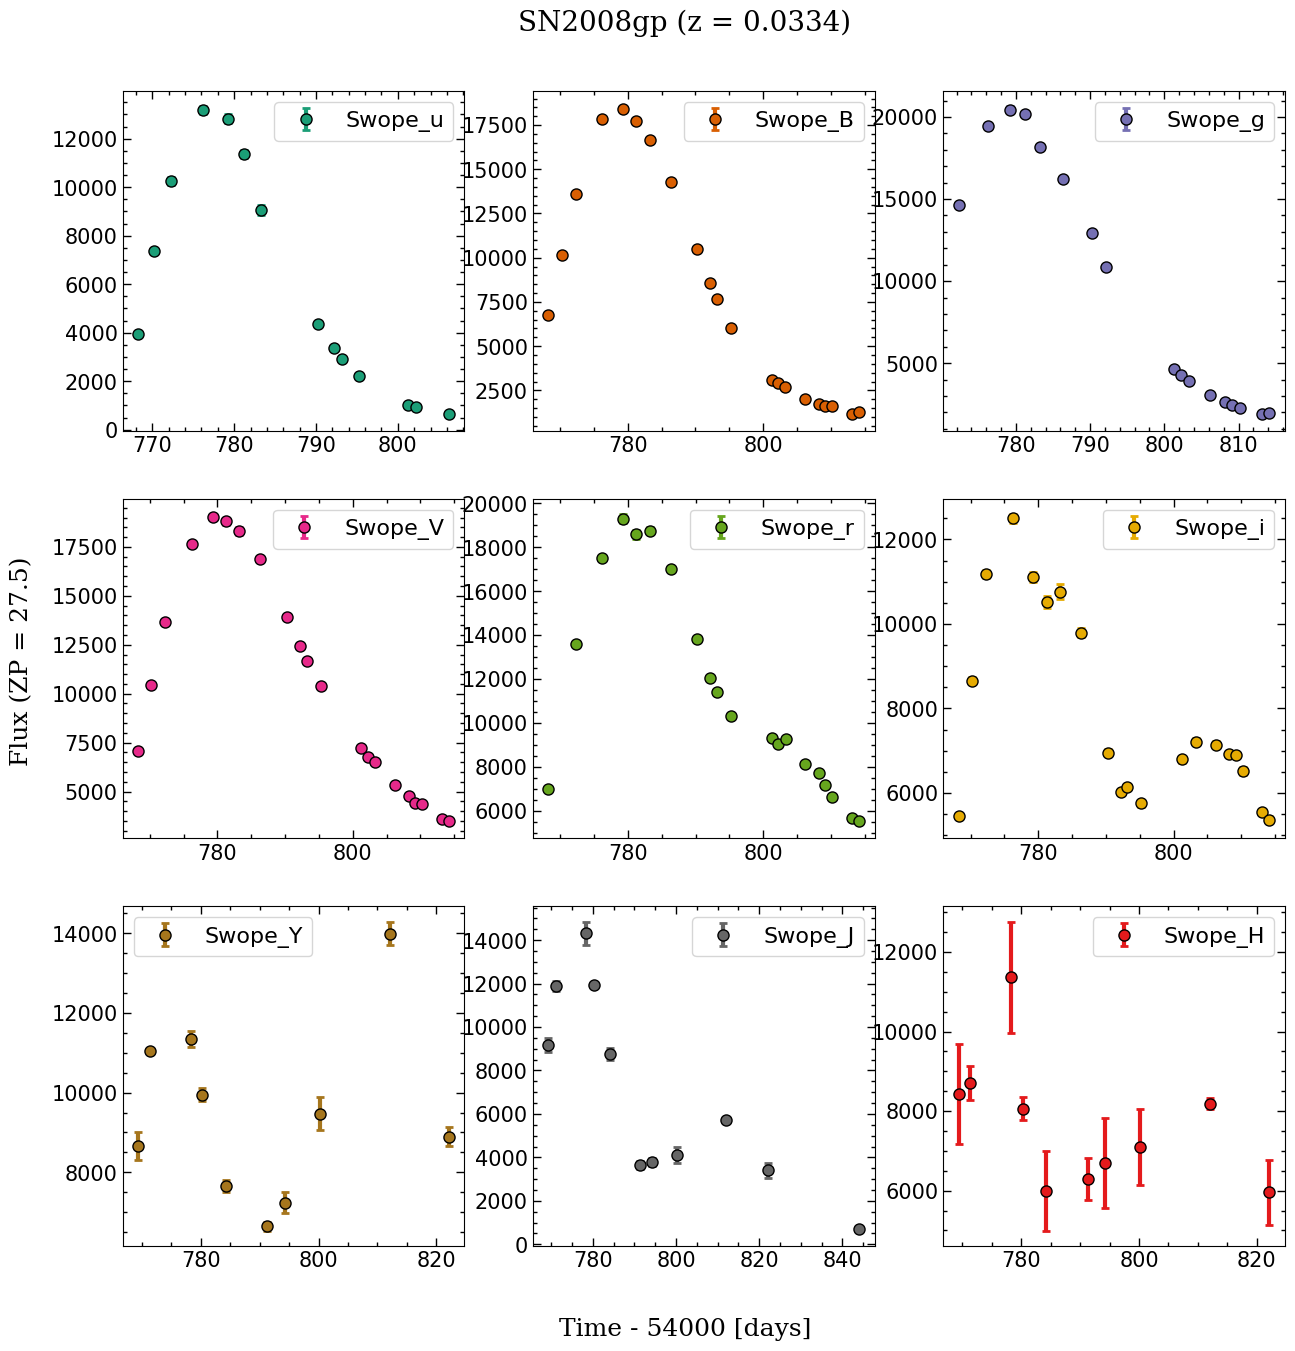

In [2]:
sn = piscola.call_sn('../../data/SN2008gp.dat')
sn.plot_lcs()

PISCOLA simply fits the light curves with Gaussian Process using the `sn.fit()` function. This estimates the optical (*B*-band) peak and other parameters.

In [3]:
sn.fit()

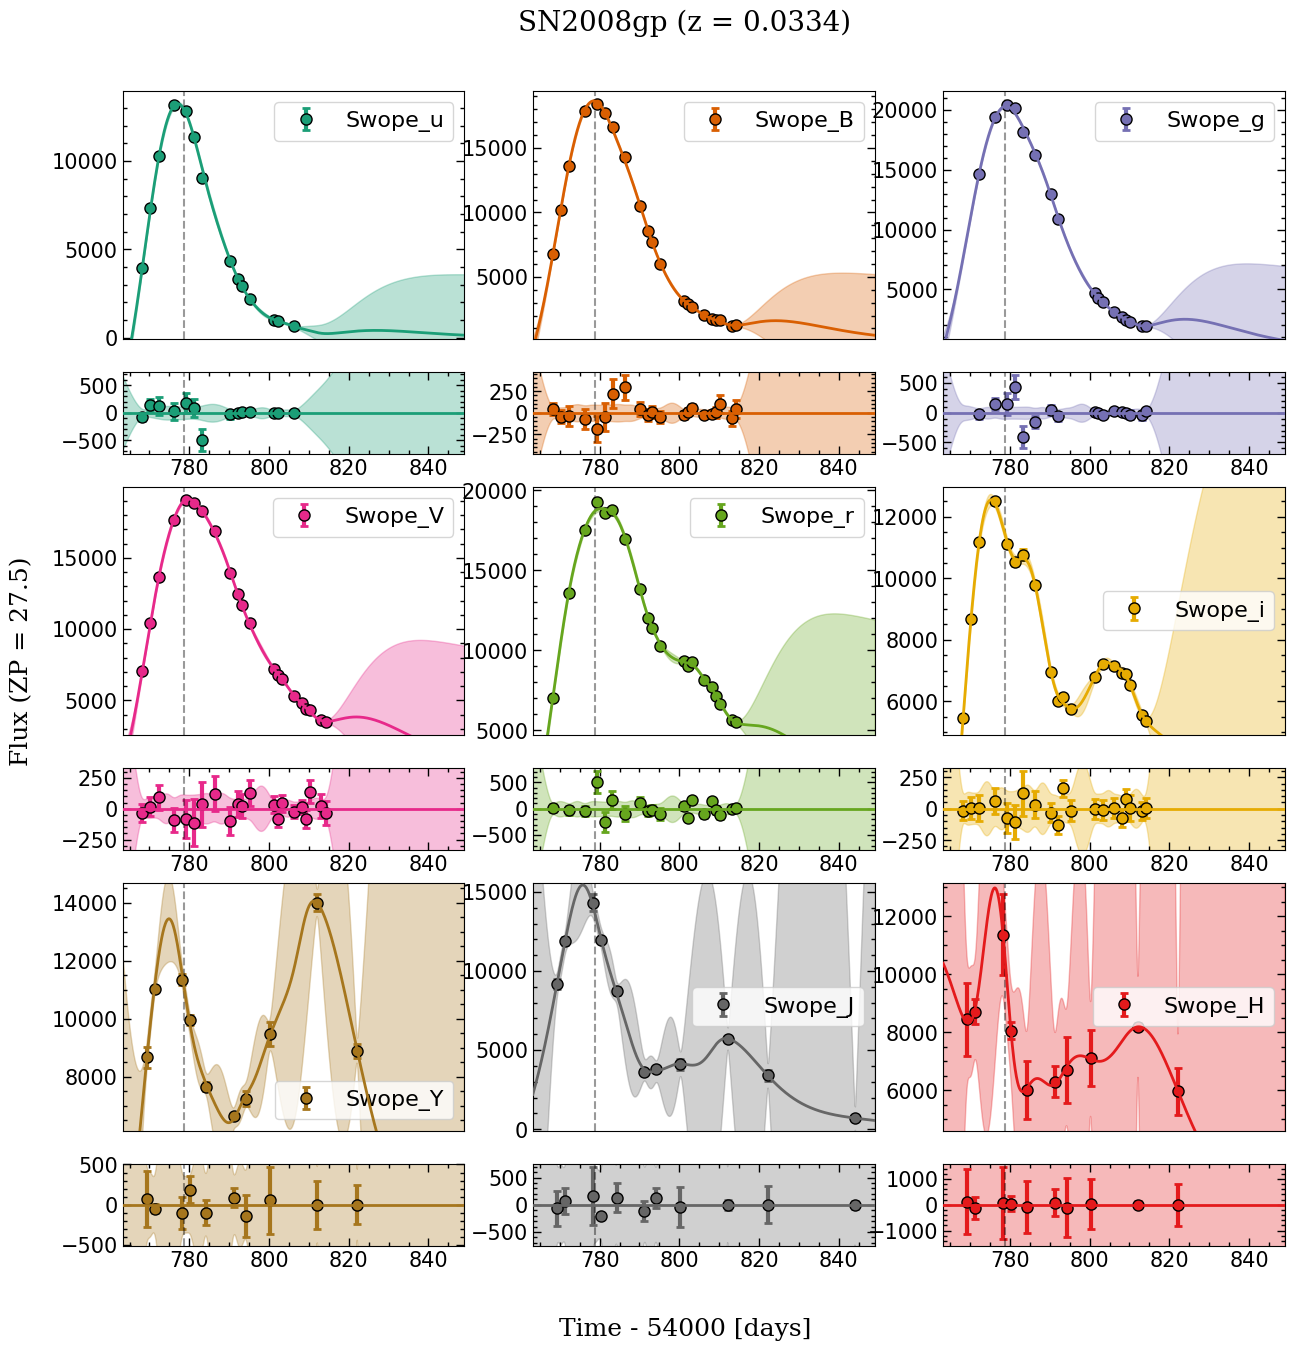

In [4]:
sn.plot_fits()

In this case, we see that PISCOLA does a good job fititng the optical light curves, but not so well with the near-infrared (NIR) light curves (*YJH*) due to the large scale difference in flux.

We can use `fit_type="log"` as argument to fit in log space, or `fit_type="asinh"` to use an inverse arcsine function, which can deal with negative values.

In [5]:
sn.fit(fit_type="log")

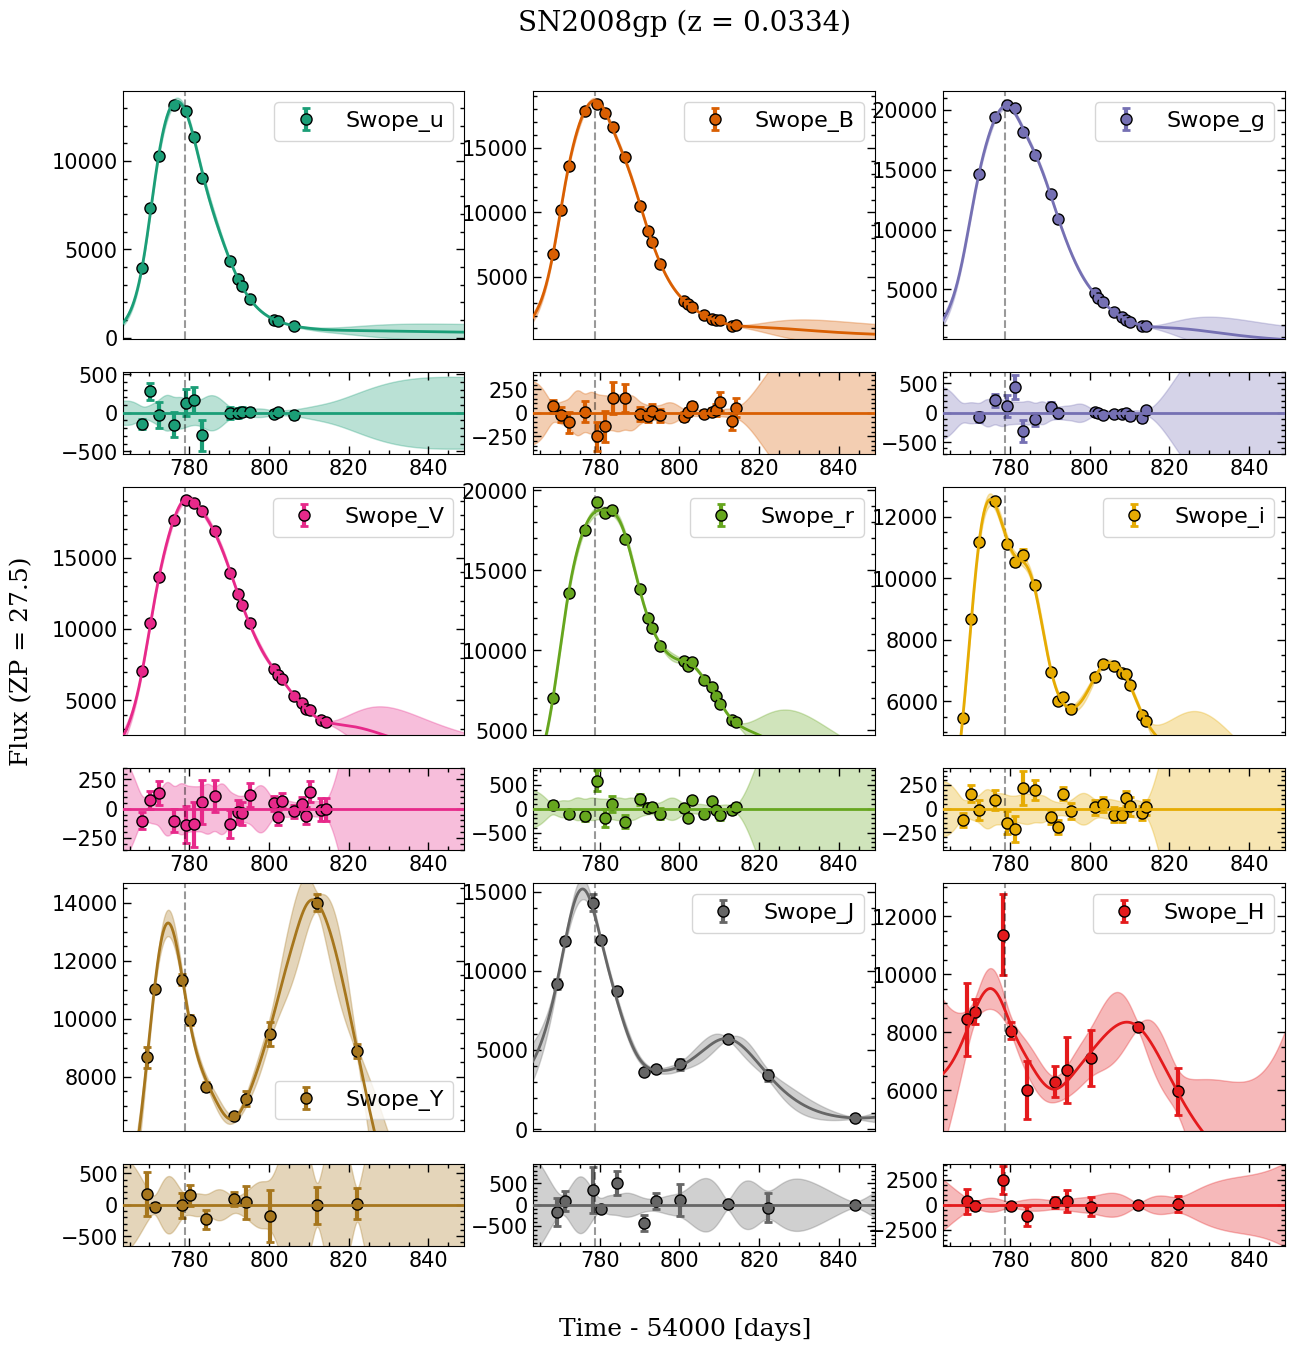

In [6]:
sn.plot_fits()

In [7]:
sn.lc_parameters

{'tmax': np.float64(54778.845),
 'tmax_err': np.float64(0.082),
 'mmax': np.float64(16.454),
 'mmax_err': np.float64(0.011),
 'dm15': np.float64(1.041),
 'dm15_err': np.float64(0.017),
 'colour': np.float64(-0.088),
 'colour_err': np.float64(0.017),
 'Bessell_B': {'tmax': np.float64(54778.845),
  'tmax_err': np.float64(0.082),
  'mmax': np.float64(16.454),
  'mmax_err': np.float64(0.011),
  'dm15': np.float64(1.041),
  'dm15_err': np.float64(0.017)},
 'Swope_u': {'tmax': np.float64(54777.295),
  'tmax_err': np.float64(0.084),
  'mmax': np.float64(16.617),
  'mmax_err': np.float64(0.026),
  'dm15': np.float64(1.423),
  'dm15_err': np.float64(0.029)},
 'Swope_B': {'tmax': np.float64(54778.949),
  'tmax_err': np.float64(0.083),
  'mmax': np.float64(16.448),
  'mmax_err': np.float64(0.011),
  'dm15': np.float64(1.047),
  'dm15_err': np.float64(0.017)},
 'Swope_g': {'tmax': np.float64(54779.259),
  'tmax_err': np.float64(0.084),
  'mmax': np.float64(16.426),
  'mmax_err': np.float64(0.011),

The fit looks much better than the previous one.

<div class="alert alert-block alert-danger">
<b>Warning:</b> have in mind the possible drawbacks of fitting in logarithmic scale. Only do it if you are well aware of these!
</div>

## Other features

### Fixing length scales

The fitting function `sn.fit()` includes the `time_scale` and `wave_scale` arguments which can be used to fix the length scales of the GP model.

### Observed parameters

There are a few functions that can help the user dependending on the needs. For instance, `sn.get_obs_params()` can be used to calcualte the time and magnitude of maximum for each band in observer frame (without any corrections):

In [8]:
sn.get_obs_params()

In [9]:
sn.obs_parameters

{'Swope_u': {'tmax': np.float64(54776.882),
  'tmax_err': np.float64(0.084),
  'mmax': np.float64(17.183),
  'mmax_err': np.float64(0.017)},
 'Swope_B': {'tmax': np.float64(54778.742),
  'tmax_err': np.float64(0.084),
  'mmax': np.float64(16.821),
  'mmax_err': np.float64(0.012)},
 'Swope_g': {'tmax': np.float64(54779.052),
  'tmax_err': np.float64(0.084),
  'mmax': np.float64(16.729),
  'mmax_err': np.float64(0.011)},
 'Swope_V': {'tmax': np.float64(54779.672),
  'tmax_err': np.float64(0.141),
  'mmax': np.float64(16.793),
  'mmax_err': np.float64(0.011)},
 'Swope_r': {'tmax': np.float64(54780.809),
  'tmax_err': np.float64(0.725),
  'mmax': np.float64(16.815),
  'mmax_err': np.float64(0.012)},
 'Swope_i': {'tmax': np.float64(54775.125),
  'tmax_err': np.float64(0.083),
  'mmax': np.float64(17.252),
  'mmax_err': np.float64(0.017)},
 'Swope_Y': {'tmax': np.float64(54774.712),
  'tmax_err': np.float64(0.0),
  'mmax': np.float64(17.19),
  'mmax_err': np.float64(0.037)},
 'Swope_J': {'tm

The rest-frame light-curves, from the inital GP fits, can also be obtained:

In [10]:
sn.rest_lcs  # this is a 'Lightcurves' object

['Bessell_B' 'Swope_u' 'Swope_B' 'Swope_g' 'Swope_V' 'Swope_r' 'Swope_i'
 'Swope_Y' 'Swope_J' 'Swope_H']

### GP model

The GP models are stored in `sn.gp_model`, and can be used to predict and any given time and wavelength using the `sn.gp_predict()` functions, respectively. Note that these can return the covariane matrix, if required.

<div class="alert alert-block alert-danger">
<b>Warning:</b> the GP models are trained in observer-frame, so if rest-frame light-curves are required, redshift correction needs to be considered.
</div>

In [11]:
sn.gp_model

GaussianProcess(
  num_data=144,
  dtype=dtype('float64'),
  kernel=Product(
    kernel1=Product(
      kernel1=Constant(value=f64[]),
      kernel2=Subspace(
        axis=0,
        kernel=Matern52(scale=f64[], distance=L1Distance())
      )
    ),
    kernel2=Subspace(
      axis=1,
      kernel=ExpSquared(scale=f64[], distance=L2Distance())
    )
  ),
  X=(f64[144](numpy), f64[144]),
  mean_function=Mean(value=f64[], func=None),
  mean=f64[144],
  noise=Diagonal(diag=f64[144]),
  solver=DirectSolver(
    X=(f64[144](numpy), f64[144]),
    variance_value=f64[144],
    covariance_value=f64[144,144],
    scale_tril=f64[144,144]
  )
)